In [35]:
import numpy as np, pandas as pd
from ISLP import load_data
import seaborn as sns
from matplotlib import pyplot as plt
import ISLP
from ISLP import load_data
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset
from torchmetrics import (MeanAbsoluteError ,
    R2Score)
from sklearn.metrics import f1_score
from torchinfo import summary
from torchvision.io import read_image
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import pytorch_lightning as L
from pytorch_lightning.loggers import CSVLogger
from torchvision.datasets import MNIST , CIFAR100
from IPython.display import clear_output
from torchvision.models import (resnet50 ,
    ResNet50_Weights)
from torchvision.transforms import (Resize ,
    Normalize ,
    CenterCrop ,
    ToTensor)
from ISLP.torch import (SimpleDataModule ,
    SimpleModule ,
    ErrorTracker ,
    rec_num_workers)
from ISLP.torch.imdb import (load_lookup ,
    load_tensor ,
    load_sparse ,
    load_sequential)
from glob import glob
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import json
sns.set_palette("pastel")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [75]:
noise = np.random.normal(scale=15, size=(60,50))
mean = np.concatenate((np.full((20, 50), 15), np.full((20, 50), 22), np.full((20, 50), 0)))
X = mean + noise

In [76]:
df = pd.DataFrame(X)
df['cluster'] = 0
df.loc[0:20, 'cluster'] = 0
df.loc[20:40, 'cluster'] = 1
df.loc[40:60, 'cluster'] = 2

In [77]:
pca = PCA(n_components=2).fit(X)

In [78]:
m = pca.transform(X)

<Axes: >

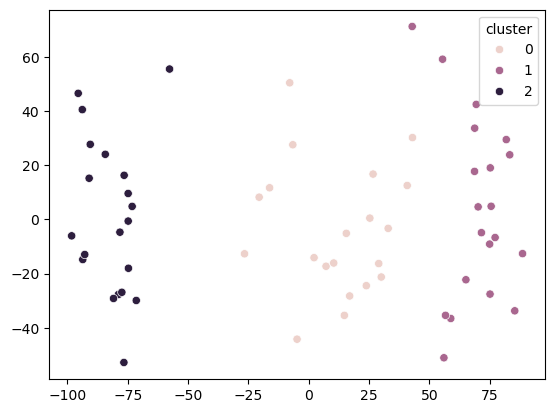

In [89]:
sns.scatterplot(x=m[:,0], y=m[:,1], hue=df['cluster'])

In [80]:
pca.explained_variance_ratio_

array([0.27366737, 0.05350217])

In [81]:
pca.components_

array([[ 0.18245371,  0.08656506,  0.16149662,  0.14949792,  0.16885376,
         0.15659576,  0.21355331,  0.1365092 ,  0.13413739,  0.07665518,
         0.14821518,  0.12990999,  0.10728309,  0.15263341,  0.13561613,
         0.18025119,  0.12940983,  0.11399371,  0.19081376,  0.14683304,
         0.11104055,  0.09557805,  0.09023473,  0.16552396,  0.09978424,
         0.17740036,  0.133301  ,  0.09680158,  0.15055744,  0.11420242,
         0.14245083,  0.14476697,  0.16110386,  0.14725183,  0.15497956,
         0.12813571,  0.18085333,  0.13054667,  0.12537735,  0.15986231,
         0.11573032,  0.15751855,  0.17879498,  0.11004985,  0.12869782,
         0.11288106,  0.16675835,  0.1100574 ,  0.10419248,  0.11575618],
       [ 0.04492527,  0.08292635, -0.09582817, -0.05941485, -0.1492386 ,
        -0.1625973 , -0.12967312,  0.00991888, -0.12081197, -0.05042049,
         0.08573816,  0.1564031 ,  0.09844688, -0.02212238,  0.23238249,
         0.0229558 ,  0.09662251,  0.15931033,  0.

In [82]:
kmean = KMeans(n_clusters=3, init='random').fit(X)

C:\Users\basti\anaconda3\envs\islp\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [83]:
df['kmean_label'] = kmean.predict(X)

In [84]:
pd.crosstab(df['cluster'], columns=df['kmean_label'])

kmean_label,0,1,2
cluster,,,
0,15,0,5
1,0,0,20
2,0,20,0


<Axes: >

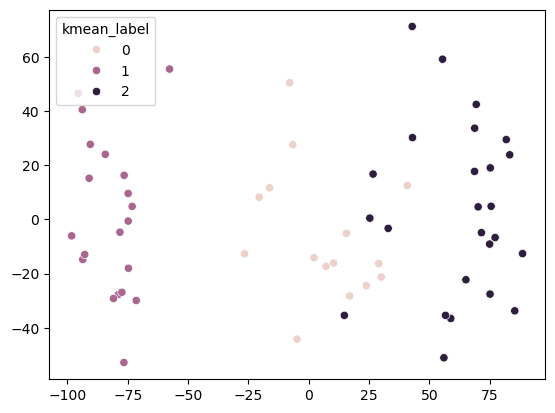

In [85]:
sns.scatterplot(x=m[:,0], y=m[:,1], hue=df['kmean_label'])

C:\Users\basti\anaconda3\envs\islp\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

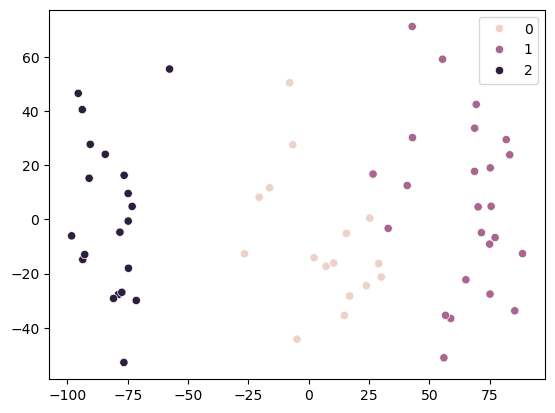

In [90]:
kmean = KMeans(n_clusters=3, init='random').fit(X)
pred = kmean.predict(X)
sns.scatterplot(x=m[:,0], y=m[:,1], hue=pred)

C:\Users\basti\anaconda3\envs\islp\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

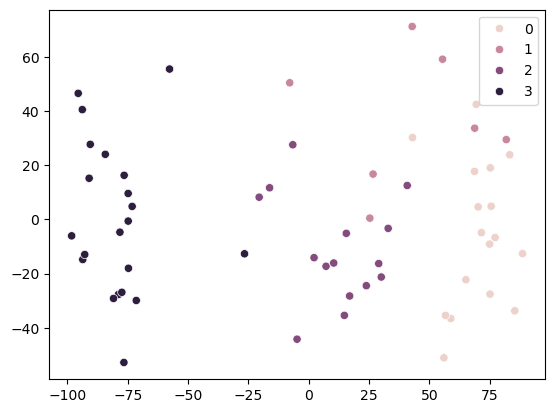

In [87]:
kmean = KMeans(n_clusters=4, init='random').fit(X)
pred = kmean.predict(X)
sns.scatterplot(x=m[:,0], y=m[:,1], hue=pred)

C:\Users\basti\anaconda3\envs\islp\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

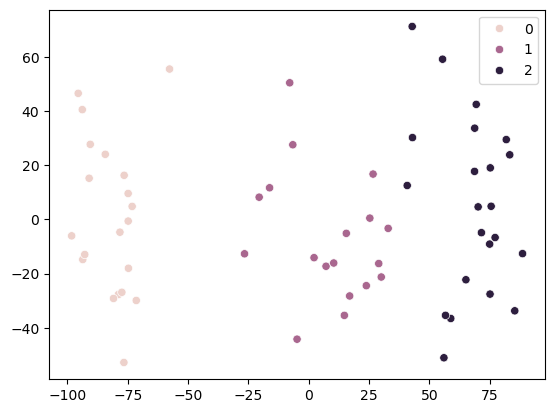

In [88]:
X_pca = m
kmean = KMeans(n_clusters=3, init='random').fit(X_pca)
pred = kmean.predict(X_pca)
sns.scatterplot(x=m[:,0], y=m[:,1], hue=pred)

C:\Users\basti\anaconda3\envs\islp\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

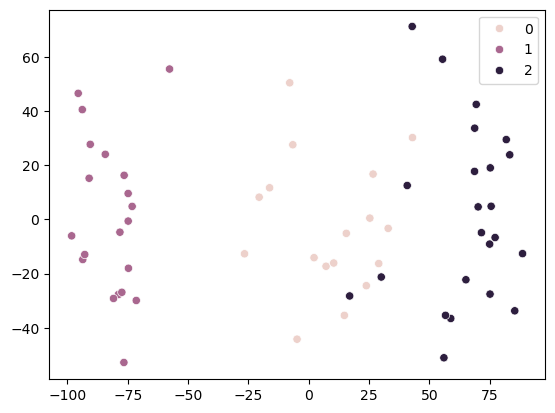

In [97]:
X_scaled = StandardScaler().fit_transform(X)
kmean = KMeans(n_clusters=3, init='random').fit(X_scaled)
pred = kmean.predict(X_scaled)
sns.scatterplot(x=m[:,0], y=m[:,1], hue=pred)